# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform a regression task and a classification task. You need to implement two classes, `DenseLayer` and `Feedforward`, and the `train` function `in implementation.py` 

In [1]:
# A bit of setup

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#need to have these two lines to work on my PC
#  https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%autosave 60


Autosaving every 60 seconds


## 1. Implement the two classes and one function (10 points)

In this step, you should implement the two classes and one function mentioned above. The autograder can check the correcness of your two classes, `DenseLayer` and `Feedforward`. Correct implementation of each of the two classes worths 5 points, so you will 10 points if you make both correct. 

The autograder cannot check the training function because this function takes too much time to run. 



## 2. A toy regression problem

By this step, you should already have implemented all necessary classes and functions in `implementation.py`. In this task, we have a toy regression problem. Please the data below and think about this question: is overfitting a problem for this problem? **Please write your answer below** (This particular question has no points, but you may want to show your thought). 

Overfitting is most likely not an issue for this problem as all points are directly sampled from the underlying function. Because there is no random variation introduced, a network acting as a universal function approximator will not attempt to account for such random variations. Therefore, a function will be able to be identified that is able to match the observed data with 100% accuracy.

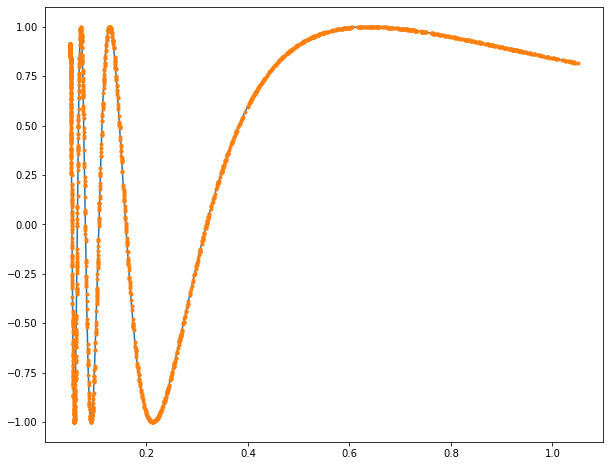

In [2]:
def target_func(x):
    y = np.sin(1 / x)
    return y

# initialize training and validation sets. 
x_train = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_train = target_func(x_train)

x_val = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_val = target_func(x_val)


# plot the function and data points
# Do you worry about overfitting problem?
sort_ind = np.argsort(x_train[:, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0], '.')


### Train the model  (5 points)

Now lets run your `train` function on this data. You will need to save your model to a file and submit it. We will test your saved model. You will earn 
 * 2 points if your validation MSE is smaller than 0.1
 * 4 points if your validation MSE is smaller than 0.05
 * 5 points if your validation MSE is smaller than 0.01



In [3]:
from implementation import train

# model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[8, 8, 8], 
#                        reg_weight=0.000001, num_train_epochs=150, task_type='regression')

#debug
model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[8, 8, 8], 
                       reg_weight=0.000001, num_train_epochs=150, task_type='regression')



Epoch 1/150

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

250/250 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.0000e+00 - val_loss: 0.6659 - val_accuracy: 5.0000e-04
Epoch 2/150
250/250 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.0000e+00 - val_loss: 0.5637 - val_accuracy: 5.0000e-04
Epoch 3/150
250/250 [==============================] - 0s 1ms/step - loss: 0.5622 - accuracy: 0.0000e+00 - val_loss: 0.5572 - val_accuracy: 5.0000e-04
Epoch 4/150
250/250 [==============================] - 

250/250 [==============================] - 0s 1ms/step - loss: 0.3595 - accuracy: 0.0000e+00 - val_loss: 0.3365 - val_accuracy: 5.0000e-04
Epoch 51/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.0000e+00 - val_loss: 0.3348 - val_accuracy: 5.0000e-04
Epoch 52/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.0000e+00 - val_loss: 0.3354 - val_accuracy: 5.0000e-04
Epoch 53/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3574 - accuracy: 0.0000e+00 - val_loss: 0.3347 - val_accuracy: 5.0000e-04
Epoch 54/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.0000e+00 - val_loss: 0.3347 - val_accuracy: 5.0000e-04
Epoch 55/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.0000e+00 - val_loss: 0.3332 - val_accuracy: 5.0000e-04
Epoch 56/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3568 - accuracy: 0.0000

Epoch 104/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.0000e+00 - val_loss: 0.3198 - val_accuracy: 5.0000e-04
Epoch 105/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.0000e+00 - val_loss: 0.3201 - val_accuracy: 5.0000e-04
Epoch 106/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.0000e+00 - val_loss: 0.3193 - val_accuracy: 5.0000e-04
Epoch 107/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3430 - accuracy: 0.0000e+00 - val_loss: 0.3193 - val_accuracy: 5.0000e-04
Epoch 108/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.0000e+00 - val_loss: 0.3198 - val_accuracy: 5.0000e-04
Epoch 109/150
250/250 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.0000e+00 - val_loss: 0.3200 - val_accuracy: 5.0000e-04
Epoch 110/150
250/250 [==============================] - 0s 1ms/step - loss: 0.343

### Plot training trace and the fitted model

Text(0, 0.5, 'Loss')

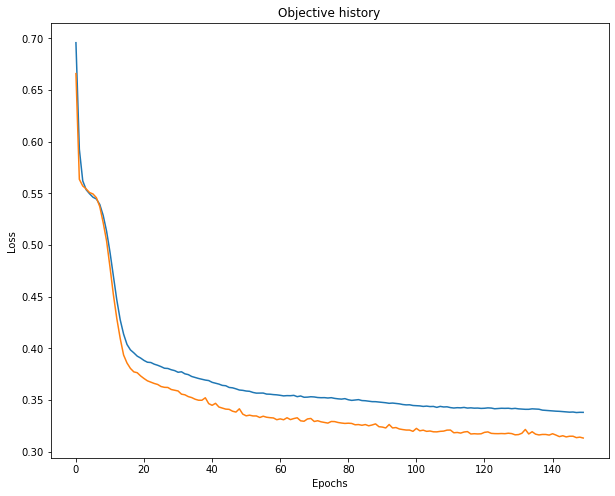

In [4]:
# Plot the loss function and train / validation accuracies
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Objective history')
plt.xlabel('Epochs')
plt.ylabel('Loss')


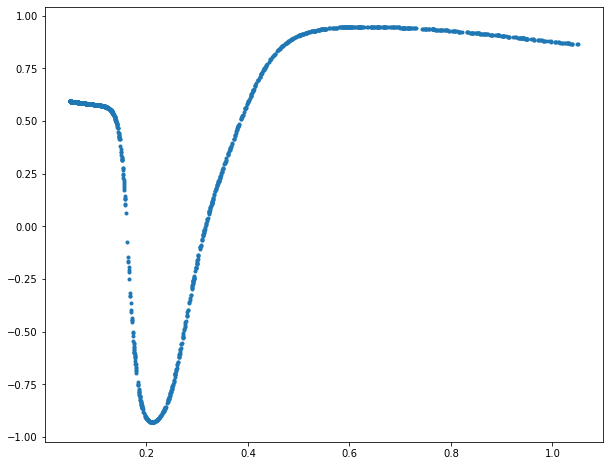

In [5]:
y_pred = model.predict(x_val)
plt.plot(x_val[:, 0], y_pred[:, 0], '.')

# actual values
# plt.plot(x_val[:, 0], y_val[:, 0], '.')

### Save the model 

Please save your model as follows. Make sure the saved model can be loaded correctly with `tf.keras.models.load_model('sin_inv_x.kmod')`. *If your model cannot be loaded, you will get zero points for this problem.*



In [ ]:
model.save('sin_inv_x.kmod')


## 3. Classifying hand-written digits

This task is a classification problem on the famous MNIST dataset. 

### Load the data

In [ ]:
from sklearn.model_selection import train_test_split

# load the dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()

# separate a validation set
x_train, y_train = data_train 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, stratify=y_train)

x_test, y_test = data_test

# treating images as vectors and create one hot representations of labesl

x_train = x_train.reshape([-1, 28 * 28])
x_val = x_val.reshape([-1, 28 * 28])
x_test = x_test.reshape([-1, 28 * 28])

y_train = tf.one_hot(y_train, depth=10).numpy()
y_val = tf.one_hot(y_val, depth=10).numpy()
y_test = tf.one_hot(y_test, depth=10).numpy()


print('Shape of training input: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of validation input: ', x_val.shape)
print('Shape of validation labels: ', y_val.shape)
print('Shape of test input: ', x_test.shape)
print('Shape of test labels: ', y_test.shape)



In [ ]:
#Test
print(tf.shape(x_train))

### Train a model

In [ ]:
from implementation import train

#default - was able to get >90% accuracy with default training settings
# model, history = train(x_train, y_train, x_val, y_val, depth=3, hidden_sizes=[8, 8], reg_weight=0.01, num_train_epochs=40,  task_type='classification')

#debug
model, history = train(x_train, y_train, x_val, y_val, depth=3, hidden_sizes=[8, 8], reg_weight=0.01, num_train_epochs=100,  task_type='classification')


### Debug the training (10 points)

A neural network with your initial setting may not work straightforwardly, so you will need to diagnose the problems in the training procedure. One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks. This task gives you a chance to gain some experience. Below, you should experiment with different values of the various hyperparameters, including 
 * data preparation (data normalization and data augmentation)
 * the achitecture (depth, hidden layer sizes, and activation functions), 
 * optimization (optimization algorithm, learning rate, learning rate decay, batch size, and numer of training epochs)
 * regularization (regularization weight, dropout).

**Expected results**. You goal in this exercise is to get as good of a result as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).  You should be aim to achieve a classification accuracy of greater than 80% on the test results.

**Grading**. You will get 
  * 5 points if your model has an accuracy over 0.70
  * 8 points if your model has an accuracy over 0.80
  * 10 points if your model has an accuracy over 0.90

In [ ]:
#debug
print(history.history.keys()) #only shows up as having "loss" and "val_loss", no accuracy or val_accuracy

In [ ]:




# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Objective history')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()


In [ ]:
from vis_utils import visualize_grid

#was this
W1 = model.layers[0].W.numpy()
W1 = W1.transpose()
W1 = W1.reshape([W1.shape[0], 28, 28, 1])

plt.imshow(visualize_grid(W1))

#debug
# W1 = model.model.layers[0].w.numpy() #-> found the error TODO: change model.model to just model.
# W1 = W1.transpose()
# W1 = W1.reshape([W1.shape[0], 28, 28, 1])

# plt.imshow(visualize_grid(W1))

Finally, test the model on the test set and show the accuracy. 

In [ ]:
y_pred = model.predict(x_test.astype(np.float32))

acc = np.mean(np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1))

print('The test accuracy is ', acc)

### Save the model

In [ ]:
model.save('mnist_cls.kmod')

## Question (5 points): what have you learned from this assignment? 

Please summarize your model tuning experience into three points below. If possible, please elaborate after your summarization. 

*Answer*:

Different 

Increasing batch size speeds up training but can hurt results

For larger batch sizes in a regression problem, a policy may ignore high error from small region if graph

Mean Squared Error works well for large differences but becomes ineffective once it becomes small